In [1]:
import csv
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk

In [2]:
updates_per_project = dict()
with open("updates_per_project.csv",'r') as file:
    # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        updates_per_project[r[0]] = r[-1]
#         num_updates = r[-1]
#         if updates_per_project.get(num_updates) is None:
#             updates_per_project[num_updates] = 1
#         else:
#             updates_per_project[num_updates] += 1



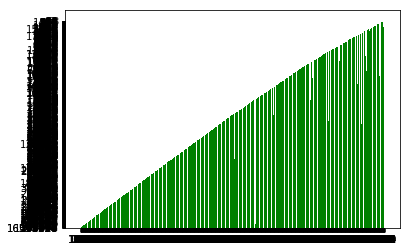

In [3]:
plt.bar(list(updates_per_project.keys()), updates_per_project.values(), color='g')
plt.show()


In [5]:
# Color Entropy
color_entropies = dict()

with open("color_per_picture_entropy.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        pic_id = r[0]
        entropy = r[1]
        color_entropies[pic_id] = entropy

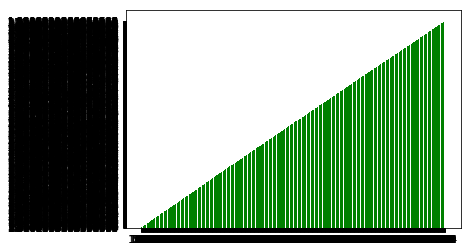

In [6]:
plt.bar(list(color_entropies.keys()), color_entropies.values(), color='g')
plt.show()